In [1]:
!pip install fasttext
!pip install transformers==4.36.2 tokenizers==0.15.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-3.0.1-py3-none-any.whl.metadata (10.0 kB)
Using cached pybind11-3.0.1-py3-none-any.whl (293 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp312-cp312-linux_x86_64.whl size=4498215 sha256=1c237e4fd7747f5edfb0a3aeec6d8d5d2112fbf1fcb66e0164dc4666f0aab27c
  Stored in directory: /root/.cache/pip/wheels/20/27/95/a7baf1b435f1cbde017cabdf1e9688526d2b0e929255a359c6
Successfully built fasttext
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 121.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.1
    Uninstalling tokenizers-0.22.1:
   

In [2]:
!git clone https://github.com/AI4Bharat/IndicLID.git

Cloning into 'IndicLID'...
remote: Enumerating objects: 337, done.
remote: Counting objects: 100% (337/337), done.
remote: Compressing objects: 100% (189/189), done.
remote: Total 337 (delta 148), reused 283 (delta 115), pack-reused 0 (from 0)
Receiving objects: 100% (337/337), 201.63 KiB | 1.58 MiB/s, done.
Resolving deltas: 100% (148/148), done.


In [3]:
%cd "/content/IndicLID/Inference"

/content/IndicLID/Inference


In [4]:
%mkdir models
%cd "/content/IndicLID/Inference/models"

/content/IndicLID/Inference/models


In [5]:
!wget https://github.com/AI4Bharat/IndicLID/releases/download/v1.0/indiclid-bert.zip
!wget https://github.com/AI4Bharat/IndicLID/releases/download/v1.0/indiclid-ftn.zip
!wget https://github.com/AI4Bharat/IndicLID/releases/download/v1.0/indiclid-ftr.zip

--2025-10-05 08:44:10--  https://github.com/AI4Bharat/IndicLID/releases/download/v1.0/indiclid-bert.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/605931363/efa054ba-62f1-46d2-90b0-71f339a2cd33?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-10-05T09%3A27%3A13Z&rscd=attachment%3B+filename%3Dindiclid-bert.zip&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-10-05T08%3A26%3A46Z&ske=2025-10-05T09%3A27%3A13Z&sks=b&skv=2018-11-09&sig=IiUIx99UdBqwwvY2YCxgPQMwPVOaywWPvVutxfStBcc%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1OTY1NzQ1MCwibmJmIjoxNzU5NjUzODUwLCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ib

In [6]:
!unzip indiclid-bert.zip
!unzip indiclid-ftn.zip
!unzip indiclid-ftr.zip

Archive:  indiclid-bert.zip
   creating: indiclid-bert/
  inflating: indiclid-bert/basline_nn_simple.pt  
Archive:  indiclid-ftn.zip
   creating: indiclid-ftn/
  inflating: indiclid-ftn/model_baseline_roman.bin  
Archive:  indiclid-ftr.zip
   creating: indiclid-ftr/
  inflating: indiclid-ftr/model_baseline_roman.bin  


In [7]:
# %cd "/content/IndicLID/"
%cd "/content/IndicLID/Inference"

/content/IndicLID/Inference


In [8]:
import torch
from transformers.models.bert.modeling_bert import (BertForSequenceClassification, BertModel, BertEmbeddings, BertEncoder,
BertLayer, BertAttention, BertSelfAttention, BertSelfOutput, BertIntermediate, BertOutput, BertPooler)
from torch.nn.modules.sparse import Embedding
from torch.nn.modules.normalization import LayerNorm
from torch.nn.modules import dropout, container, linear, activation
from transformers.activations import GELUActivation
from transformers.models.bert.configuration_bert import BertConfig


torch.serialization.add_safe_globals([BertForSequenceClassification, BertModel, BertEmbeddings,
Embedding, LayerNorm, dropout.Dropout, BertEncoder, container.ModuleList, BertLayer, BertAttention,
BertSelfAttention, linear.Linear, BertSelfOutput, BertIntermediate, GELUActivation, torch._C._nn.gelu,
BertOutput, BertConfig, BertPooler, activation.Tanh])

from ai4bharat.IndicLID import IndicLID

IndicLID_model = IndicLID(input_threshold=0.5, roman_lid_threshold=0.6)

/usr/local/lib/python3.12/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.12/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.12/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/content/IndicLID/Inference/ai4bharat/IndicLID.py:190: SyntaxWarning: invalid escape sequence '\|'
  special_char_pattern = re.compile('[@_!#$%^&*()<>?/\|}{~:]')
/content/IndicLID/Inference/ai4bharat/IndicLID.py:194: SyntaxWarning: invalid escape 

tokenizer_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.75M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [9]:
import pandas as pd
roman_test = pd.read_csv("/content/roman_test.csv")

In [25]:
batch_size = 32
test_samples = list(roman_test["processed"])
import time
start = time.time()
outputs = IndicLID_model.batch_predict(test_samples, batch_size)
end = time.time()

In [26]:
suffixes = ["_Latn", "_Deva", "_Arab"]
pred_label = []
for _, label, _, _ in outputs:
    for suf in suffixes:
        label = label.replace(suf, "")
    pred_label.append(label)

In [27]:
code_to_lang = {
    'asm': 'Assamese',
    'ben': 'Bangla',
    'brx': 'Bodo',
    'guj': 'Gujarati',
    'hin': 'Hindi',
    'kan': 'Kannada',
    'kas': 'Kashmiri',
    'kok': 'Konkani',
    'mai': 'Maithili',
    'mal': 'Malayalam',
    'mni': 'Manipuri',
    'mar': 'Marathi',
    'nep': 'Nepali',
    'ori': 'Oriya',
    'pan': 'Punjabi',
    'san': 'Sanskrit',
    'snd': 'Sindhi',
    'tam': 'Tamil',
    'tel': 'Telugu',
    'urd': 'Urdu',
    'eng': 'English',
    'other': 'Other'
}

In [28]:
pred = []
for label in pred_label:
  label = code_to_lang.get(label)
  pred.append(label)

In [29]:
result = pd.DataFrame()
result["text"] = list(roman_test["processed"])
result["true"] = list(roman_test["label"])
result["pred"] = pred

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = result['true'].tolist()
preds_final = result['pred'].tolist()

accuracy = accuracy_score(y_true, preds_final)
precision = precision_score(y_true, preds_final, average='macro', zero_division=0)
recall = recall_score(y_true, preds_final, average='macro', zero_division=0)
f1 = f1_score(y_true, preds_final, average='macro', zero_division=0)

print("Roman Accuracy:", accuracy*100)
print("Roman Precision (macro):", precision*100)
print("Roman Recall (macro):", recall*100)
print("Roman F1-score (macro):", f1*100)
print(f"Throughput: {len(roman_test)/(end - start)} sentence/seconds")

Roman Accuracy: 74.73531466652335
Roman Precision (macro): 59.66372881544182
Roman Recall (macro): 73.42393780282652
Roman F1-score (macro): 60.87914351317845
Throughput: 1173.7606860414267 sentence/seconds


In [31]:
print("============= After filtering out those texts which are predicted as English and Others ==============")

result = result[~result["pred"].isin(["English", "Other"])]
y_true = result['true'].tolist()
preds_final = result['pred'].tolist()

accuracy = accuracy_score(y_true, preds_final)
precision = precision_score(y_true, preds_final, average='macro', zero_division=0)
recall = recall_score(y_true, preds_final, average='macro', zero_division=0)
f1 = f1_score(y_true, preds_final, average='macro', zero_division=0)

print("Roman Accuracy:", accuracy*100)
print("Roman Precision (macro):", precision*100)
print("Roman Recall (macro):", recall*100)
print("Roman F1-score (macro):", f1*100)
print(f"Throughput: {len(roman_test)/(end - start)} sentence/seconds")

============= After filtering out those texts which are predicted as English and Others ==============
Roman Accuracy: 78.10165683796686
Roman Precision (macro): 65.630101696986
Roman Recall (macro): 83.64581652557165
Roman F1-score (macro): 68.16279256963405
Throughput: 1173.7606860414267 sentence/seconds


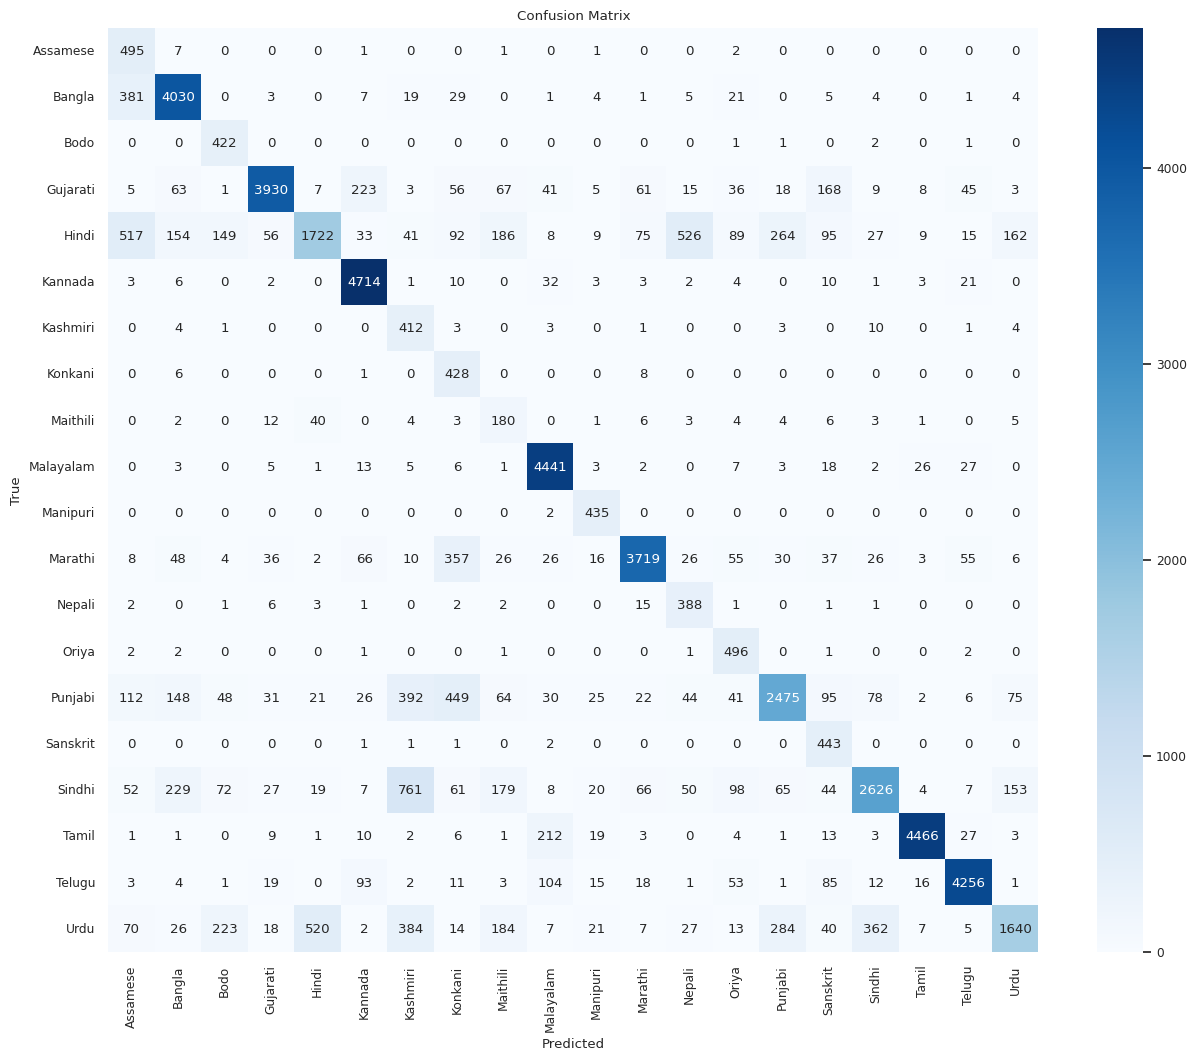

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(df_results, title):
    # Get unique labels from both true and pred columns
    labels = sorted(set(df_results['true'].unique()) | set(df_results['pred'].unique()))

    cm = confusion_matrix(df_results['true'], df_results['pred'], labels=labels)

    plt.figure(figsize=(15, 12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

plot_confusion_matrix(result, "Confusion Matrix")

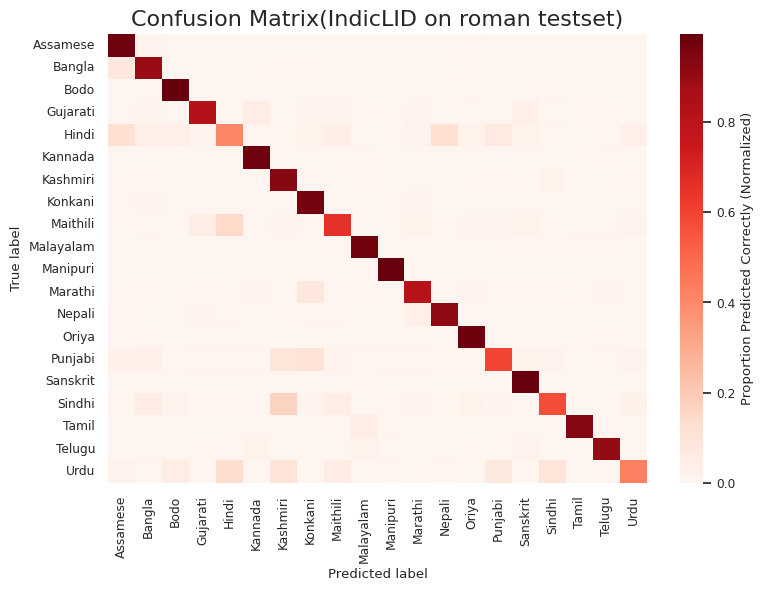

In [36]:
cm_raw = confusion_matrix(y_true, preds_final, labels=np.unique(y_true))

cm_normalized = cm_raw.astype('float') / cm_raw.sum(axis=1)[:, np.newaxis]
cm_df = pd.DataFrame(cm_normalized, index=np.unique(y_true), columns=np.unique(y_true))

plt.figure(figsize=(8, 6))
sns.set(font_scale=0.8)

# Create the heatmap
sns.heatmap(
    cm_df,
    cmap="Reds",
    cbar_kws={'label': 'Proportion Predicted Correctly (Normalized)'}
)

# Customization
plt.title('Confusion Matrix(IndicLID on roman testset)', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

n=1 → accuracy=30.3122
n=2 → accuracy=46.6422
n=3 → accuracy=55.4807
n=4 → accuracy=60.6452
n=5 → accuracy=63.8904
n=6 → accuracy=66.6014
n=7 → accuracy=68.7581
n=8 → accuracy=70.2084
n=9 → accuracy=71.3839
n=10 → accuracy=72.8067
n=11 → accuracy=73.5253
n=12 → accuracy=74.2373
n=13 → accuracy=74.8864
n=14 → accuracy=75.3214
n=15 → accuracy=75.7268
n=16 → accuracy=75.9864
n=17 → accuracy=76.4169
n=18 → accuracy=76.6586
n=19 → accuracy=76.8012
n=20 → accuracy=77.0777
n=21 → accuracy=77.1951
n=22 → accuracy=77.3433
n=23 → accuracy=77.5184
n=24 → accuracy=77.5542
n=25 → accuracy=77.5940
n=26 → accuracy=77.6549
n=27 → accuracy=77.7757
n=28 → accuracy=77.7593
n=29 → accuracy=77.8163
n=30 → accuracy=77.8610


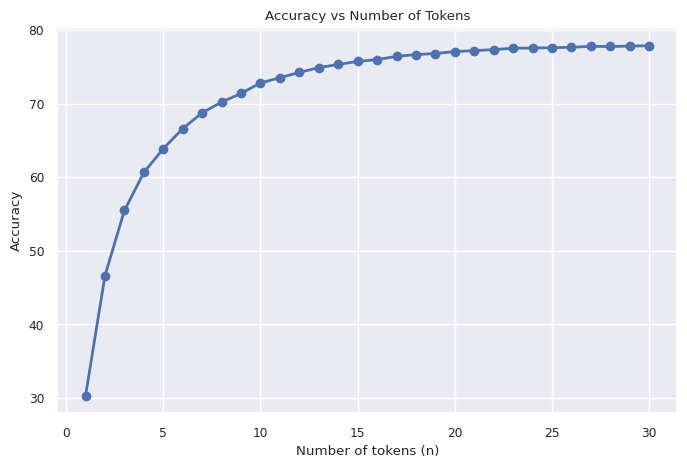

In [22]:
import numpy as np
import re

token_limits = range(1, 31)
accuracies = []

true_labels = roman_test["label"].tolist()

for n in token_limits:
    truncated_samples = [" ".join(text.split()[:n]) for text in roman_test["processed"]]

    outputs = IndicLID_model.batch_predict(truncated_samples, batch_size=32)

    suffixes = ["_Latn", "_Deva", "_Arab"]
    pred_label = []
    for _, label, _, _ in outputs:
        for suf in suffixes:
            label = label.replace(suf, "")
        pred_label.append(label)

    preds = [code_to_lang.get(label, label) for label in pred_label]

    result_temp = pd.DataFrame({
        "true": true_labels,
        "pred": preds
    })
    result_filtered = result_temp[~result_temp["pred"].isin(["English", "Other"])].reset_index(drop=True)

    y_true = result_filtered["true"].tolist()
    y_pred = result_filtered["pred"].tolist()
    acc = accuracy_score(y_true, y_pred) * 100
    accuracies.append(acc)

    print(f"n={n} → accuracy={acc:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(token_limits, accuracies, marker='o', linewidth=2)
plt.title("Accuracy vs Number of Tokens")
plt.xlabel("Number of tokens (n)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
